<div align="center">

Universidad de los Andes  
Facultad de Ingeniería  
Departamento de Ingeniería de Sistemas y Computación  

<br><br><br><br>

<p style="font-size:22px; font-weight:bold;">
PROYECTO DE GRADO
</p>

<br><br><br><br>

<p style="font-size:18px; line-height:1.4;">
<strong>
MÉTODOS DE <i>CLUSTERING</i> BASADOS EN <i>DEEP LEARNING</i> APLICADOS EN EL ANÁLISIS<br>
BIOLÓGICO DE LA MICROBIOTA INTESTINAL<br>
</strong>
</p>

<br><br><br><br>

Autor: Juan Felipe Lancheros Carrillo  
Código de estudiante: 202211004

<br><br><br><br>

Asesora: María del Pilar Villamil Giraldo

<br><br><br><br>

Bogotá, Colombia  
2025

</div>

---


## Referencias
* JustGlowing (2025). minisom. GitHub. https://github.com/JustGlowing/minisom/
* Nanda, A. (2024). Mapas autoorganizativos: Una guía intuitiva con ejemplos en Python. https://www.datacamp.com/es/tutorial/self-organizing-maps
---

## Verificación de las versiones de las librerías

In [ ]:
import sys
import pandas as pd
import numpy as np # Introduces randomness in the code
import matplotlib
import matplotlib.pyplot as plt

print(f"Python version: {sys.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")

In [ ]:
# For SOM
!pip install MiniSom # It says the versions inside parentheses shown in the output (Requires management of randomness)
from minisom import MiniSom

## Entrada del archivo con datos escalados

In [ ]:
data = pd.read_csv("scaled_data_robust.csv", decimal=',', index_col=0)
data

,sex,city_Bogota,city_Bucaramanga,city_Cali,city_Medellin,age,Otu00001,Otu00002,Otu00003,Otu00004,...,Otu00162,Otu00175,Otu00177,Otu00188,Otu00197,Otu00201,Otu00220,Otu00228,Otu00284,Otu00325
MI_001_H,1,0,0,0,1,-0.2777777777777778,0.8557377049180328,0.03309692671394799,-0.35109170305676857,-0.24035874439461882,...,0.07692307692307693,5.1,0.1875,-0.2857142857142857,-0.25,0.4074074074074074,-0.16666666666666666,-0.2727272727272727,-0.10526315789473684,0.041666666666666664
MI_002_H,0,0,0,0,1,-0.05555555555555555,0.2459016393442623,-0.285263987391647,-0.28034934497816594,1.0932735426008968,...,1.3846153846153846,0.7,-0.0625,-0.14285714285714285,-0.08333333333333333,-0.1111111111111111,-0.08333333333333333,-0.2727272727272727,0.3684210526315789,3.4583333333333335
MI_003_H,1,0,0,0,1,0.6666666666666666,-0.24262295081967214,-0.2202521670606777,5.0296943231441045,-0.21883408071748878,...,-0.23076923076923078,-0.3,-0.1875,-0.2857142857142857,0.5833333333333334,5.037037037037037,0.0,-0.2727272727272727,-0.21052631578947367,-0.25
MI_004_H,1,0,0,0,1,0.9444444444444444,0.5606557377049181,0.42671394799054374,-0.25589519650655024,-0.24708520179372198,...,-0.23076923076923078,-0.3,0.25,-0.14285714285714285,0.3333333333333333,0.1111111111111111,-0.4166666666666667,-0.2727272727272727,-0.21052631578947367,-0.25
MI_005_H,0,0,0,0,1,0.16666666666666666,-0.30491803278688523,-0.2880220646178093,-0.3947598253275109,-0.24887892376681614,...,-0.23076923076923078,4.9,0.1875,3.5714285714285716,-0.25,-0.1111111111111111,2.9166666666666665,-0.2727272727272727,-0.21052631578947367,-0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MI_454_H,1,0,0,1,0,1.0555555555555556,-0.30491803278688523,-0.28841607565011823,-0.11091703056768559,0.1609865470852018,...,-0.23076923076923078,0.4,14.3125,0.14285714285714285,0.08333333333333333,0.48148148148148145,-0.4166666666666667,0.2727272727272727,-0.21052631578947367,-0.25
MI_455_H,1,0,0,1,0,1.0555555555555556,0.3081967213114754,0.2115839243498818,0.16943231441048034,13.19103139013453,...,-0.15384615384615385,13.8,1.5625,-0.2857142857142857,1.0833333333333333,-0.1111111111111111,-0.3333333333333333,1.0,-0.05263157894736842,-0.25
MI_456_H,0,0,0,1,0,0.2777777777777778,1.0655737704918034,0.3069345941686367,-0.22183406113537119,-0.2452914798206278,...,-0.23076923076923078,0.2,3.3125,0.0,-0.25,0.14814814814814814,1.0833333333333333,5.818181818181818,-0.21052631578947367,1.1666666666666667
MI_458_H1,1,0,0,1,0,-0.05555555555555555,0.31475409836065577,1.0677698975571317,-0.2812227074235808,3.0766816143497757,...,0.07692307692307693,0.2,0.125,1.0714285714285714,0.5833333333333334,-0.1111111111111111,-0.4166666666666667,-0.2727272727272727,-0.05263157894736842,-0.25


In [ ]:
pd.set_option('display.max_rows', None)
data.dtypes

,0
sex,int64
city_Bogota,int64
city_Bucaramanga,int64
city_Cali,int64
city_Medellin,int64
age,float64
Otu00001,float64
Otu00002,float64
Otu00003,float64
Otu00004,float64


In [ ]:
for column in data.columns:
  if column not in ["sex", "city_Bogota", "city_Bucaramanga", "city_Cali", "city_Medellin"]:
    data[column] = data[column].astype(float)

In [ ]:
# Convert the DataFrame to a NumPy array
scaled_data = data.values

print("Type of scaled_data_robust_np:")
print(type(scaled_data))
print("Shape of scaled_data_robust_np:")
print(scaled_data.shape)
print("First 5 rows of the converted NumPy array:")
print(scaled_data[:5])

Type of scaled_data_robust_np:
<class 'numpy.ndarray'>
Shape of scaled_data_robust_np:
(441, 106)
First 5 rows of the converted NumPy array:
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00 -2.77777778e-01  8.55737705e-01  3.30969267e-02
  -3.51091703e-01 -2.40358744e-01  2.96958855e-01  1.82088075e-01
   3.73029772e-01  7.24112962e-04 -1.20792079e-01  1.60734463e+00
   2.46981339e-01  1.63916392e-01 -2.12738854e-01 -6.93950178e-02
  -5.34351145e-02 -4.12500000e-01  2.40121581e-01  3.30787589e+00
  -9.85915493e-02  2.30288462e+00  5.90909091e-01  9.80392157e-02
  -6.45161290e-02  2.01398601e+00  4.50000000e-02 -3.19148936e-01
  -1.93548387e-01  2.41923077e+01  1.81415929e-01 -2.80303030e-01
  -6.57894737e-02  3.40000000e-01 -1.37362637e-01 -1.97916667e-01
   5.74193548e-01  4.54545455e-02  1.03958333e+01  6.49350649e-01
   8.18918919e+00  1.00000000e+00  3.61111111e-01  5.66473988e-01
   4.14634146e+00  2.23529412e+00  4.12698413e-01  9.38461538e-01
 

## Definición de las pruebas

In [ ]:
# Reference: (Nanda, 2024)

SOM_N_VARIABLES  = data.shape[1]

Valores a probar por parámetros

* decay_function
  * 'inverse_decay_to_zero'
  * 'asymptotic_decay'
* neighborhood_function
  * 'gaussian'
  * 'mexican_hat'
* activation_distance
  * 'euclidean'
  * 'cosine'
  * 'chebyshev'
* sigma_decay_function
  * 'inverse_decay_to_one'
  * 'asymptotic_decay'

### Test 0

In [ ]:
DECAY_FUNCTION = 'linear_decay_to_zero'
NEIGHBORHOOD_FUNCTION = 'triangle'
ACTIVATION_DISTANCE = 'euclidean'
SIGMA_DECAY_FUNCTION = 'linear_decay_to_one'
RANDOM_SEED = 123

In [ ]:
som = MiniSom(
        SOM_X_AXIS_NODES,
        SOM_Y_AXIS_NODES,
        SOM_N_VARIABLES,
        sigma = 1,
        learning_rate = 0.5,
        decay_function = DECAY_FUNCTION,
        neighborhood_function = NEIGHBORHOOD_FUNCTION,
        topology = 'rectangular',
        activation_distance = ACTIVATION_DISTANCE,
        sigma_decay_function = SIGMA_DECAY_FUNCTION,
        random_seed = RANDOM_SEED,
        )

In [ ]:
som.random_weights_init(scaled_data)

/usr/local/lib/python3.12/dist-packages/minisom.py:447: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


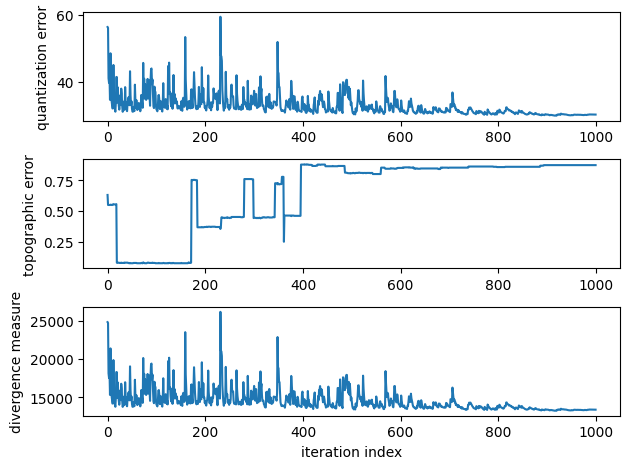

In [ ]:
max_iter = 1000
q_error = []
t_error = []
d_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(scaled_data))
    som.update(scaled_data[rand_i], som.winner(scaled_data[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(scaled_data))
    t_error.append(som.topographic_error(scaled_data))
    d_error.append(som.distortion_measure(scaled_data))

plt.subplot(3,1,1)
plt.plot(np.arange(max_iter), q_error)
plt.ylabel('quantization error')
plt.subplot(3,1,2)
plt.plot(np.arange(max_iter), t_error)
plt.ylabel('topographic error')
plt.subplot(3,1,3)
plt.plot(np.arange(max_iter), d_error)
plt.ylabel('divergence measure')
plt.xlabel('iteration index')
plt.tight_layout()
plt.show()

In [ ]:
min_q_error_iteration = np.argmin(q_error)
print(f"Iteration with minimum quantization error: {min_q_error_iteration}")


Iteration with minimum quantization error: 380


In [ ]:
optimal_q_error = q_error[min_q_error_iteration]
optimal_t_error = t_error[min_q_error_iteration]
optimal_d_error = d_error[min_q_error_iteration]

print(f"Quantization Error at optimal iteration: {optimal_q_error:.4f}")
print(f"Topographic Error at optimal iteration: {optimal_t_error:.4f}")
print(f"Distortion Measure at optimal iteration: {optimal_d_error:.4f}")

Quantization Error at optimal iteration: 30.5143
Topographic Error at optimal iteration: 0.6599
Distortion Measure at optimal iteration: 13456.7865


## Automático

In [ ]:
df_som_trials = pd.DataFrame(columns=['axis_size', 'decay_function', 'neighborhood_function', 'activation_distance', 'sigma_decay_function', 'random_seed', 'optimal_num_of_iteratios', 'optimal_q_error', 'optimal_t_error', 'optimal_d_error'])
df_som_trials

,axis_size,decay_function,neighborhood_function,activation_distance,sigma_decay_function,random_seed,optimal_num_of_iteratios,optimal_q_error,optimal_t_error,optimal_d_error


In [ ]:
axis_sizes = [2, 3, 4, 5, 6]
decay_functions = ['linear_decay_to_zero', 'asymptotic_decay']
neighborhood_functions = ['gaussian', 'mexican_hat']
activation_distances = ['cosine', 'chebyshev']
sigma_decay_functions = ['inverse_decay_to_one', 'asymptotic_decay']

In [ ]:
rs = 149

In [ ]:
def som_trial(axis_size, decay_function, neighborhood_function, activation_distance, sigma_decay_function, random_seed):

    som = MiniSom(
          axis_size,
          axis_size,
          SOM_N_VARIABLES,
          sigma = 1,
          learning_rate = 0.5,
          decay_function = decay_function,
          neighborhood_function = neighborhood_function,
          topology = 'rectangular',
          activation_distance = activation_distance,
          sigma_decay_function = sigma_decay_function,
          random_seed = random_seed,
          )

    som.random_weights_init(scaled_data)

    # Reference: (JustGlowing, 2025)

    max_iter = 5000
    q_error = []
    t_error = []
    d_error = []

    for i in range(max_iter):
        rand_i = np.random.randint(len(scaled_data))
        som.update(scaled_data[rand_i], som.winner(scaled_data[rand_i]), i, max_iter)
        q_error.append(som.quantization_error(scaled_data))
        t_error.append(som.topographic_error(scaled_data))
        d_error.append(som.distortion_measure(scaled_data))

    plt.subplot(3,1,1)
    plt.plot(np.arange(max_iter), q_error)
    plt.ylabel('quantization error')
    plt.subplot(3,1,2)
    plt.plot(np.arange(max_iter), t_error)
    plt.ylabel('topographic error')
    plt.subplot(3,1,3)
    plt.plot(np.arange(max_iter), d_error)
    plt.ylabel('divergence measure')
    plt.xlabel('iteration index')
    plt.tight_layout()
    plt.show()

    min_q_error_iteration = np.argmin(q_error)
    print(f"Iteration with minimum quantization error: {min_q_error_iteration}")

    optimal_q_error = q_error[min_q_error_iteration]
    optimal_t_error = t_error[min_q_error_iteration]
    optimal_d_error = d_error[min_q_error_iteration]

    print(f"Quantization Error at optimal iteration: {optimal_q_error:.4f}")
    print(f"Topographic Error at optimal iteration: {optimal_t_error:.4f}")
    print(f"Distortion Measure at optimal iteration: {optimal_d_error:.4f}")

    df_som_trials.loc[len(df_som_trials)] = [axis_size, decay_function, neighborhood_function,
                                             activation_distance, sigma_decay_function, random_seed,
                                             min_q_error_iteration, optimal_q_error, optimal_t_error, optimal_d_error]



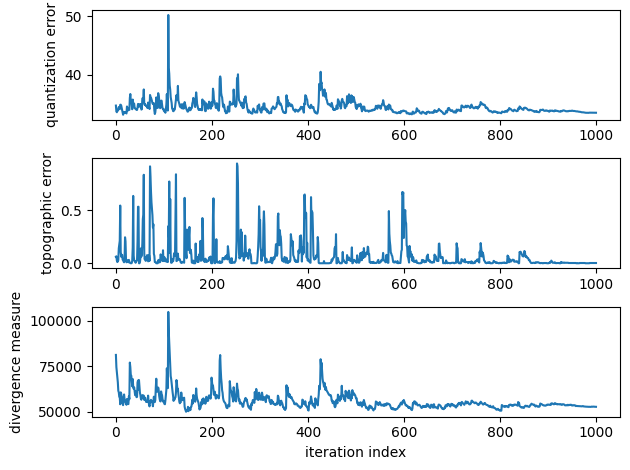

Iteration with minimum quantization error: 15
Quantization Error at optimal iteration: 33.1061
Topographic Error at optimal iteration: 0.0317
Distortion Measure at optimal iteration: 53624.4038


In [ ]:
# Test
# som_trial(axis_sizes[1], decay_functions[0], neighborhood_functions[0], activation_distances[0], sigma_decay_functions[0], random_seed=RANDOM_SEED+1)

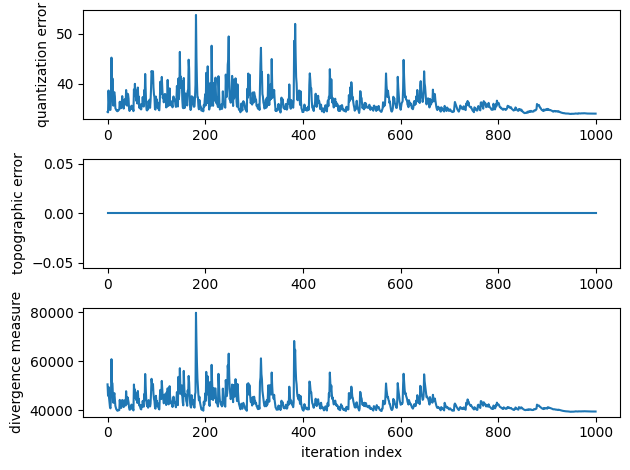

Iteration with minimum quantization error: 949
Quantization Error at optimal iteration: 33.8889
Topographic Error at optimal iteration: 0.0000
Distortion Measure at optimal iteration: 39315.2854


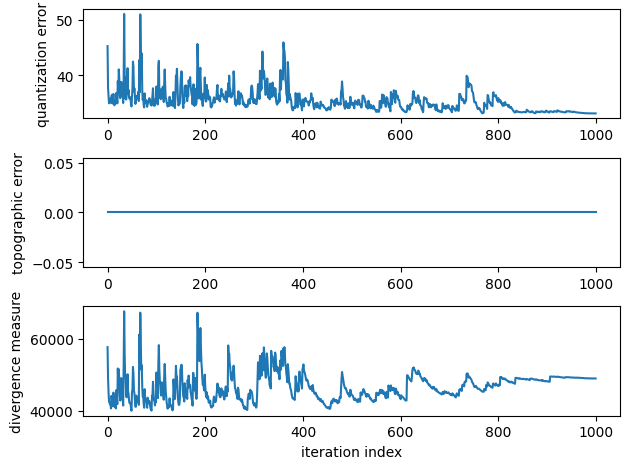

Iteration with minimum quantization error: 998
Quantization Error at optimal iteration: 33.0584
Topographic Error at optimal iteration: 0.0000
Distortion Measure at optimal iteration: 49006.5375


/usr/local/lib/python3.12/dist-packages/minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


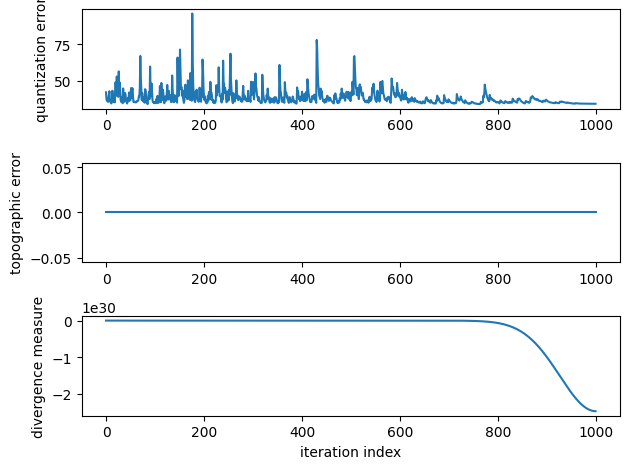

Iteration with minimum quantization error: 85
Quantization Error at optimal iteration: 34.1262
Topographic Error at optimal iteration: 0.0000
Distortion Measure at optimal iteration: -2581891531.9711


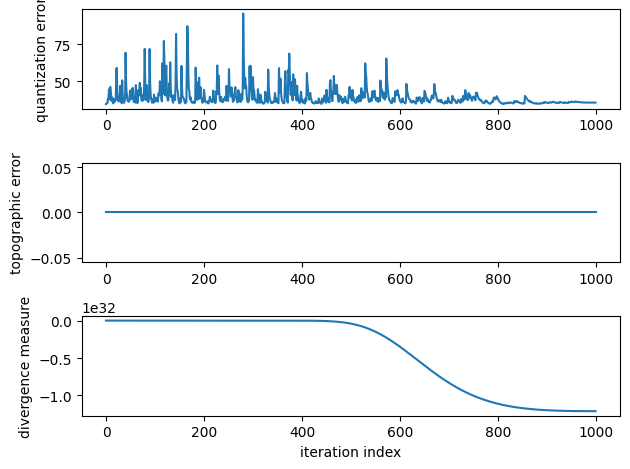

Iteration with minimum quantization error: 0
Quantization Error at optimal iteration: 34.5952
Topographic Error at optimal iteration: 0.0000
Distortion Measure at optimal iteration: -8565.0993


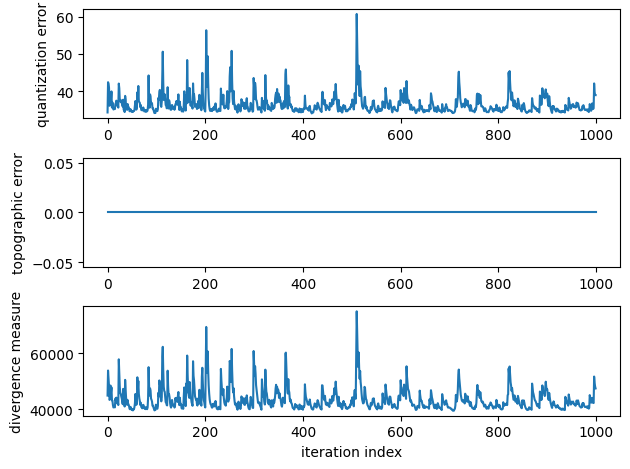

Iteration with minimum quantization error: 418
Quantization Error at optimal iteration: 34.0494
Topographic Error at optimal iteration: 0.0000
Distortion Measure at optimal iteration: 40103.5934


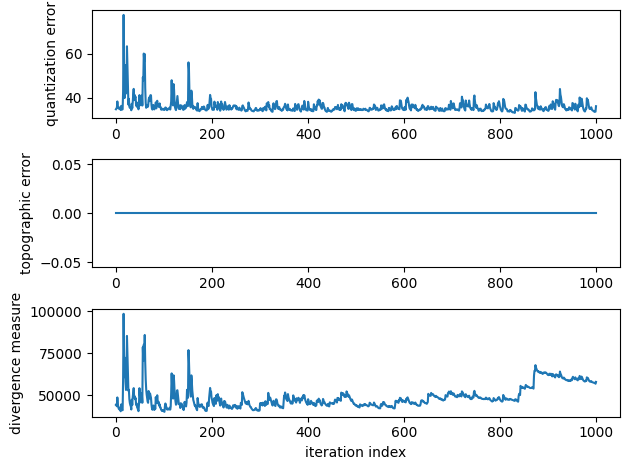

Iteration with minimum quantization error: 830
Quantization Error at optimal iteration: 33.1822
Topographic Error at optimal iteration: 0.0000
Distortion Measure at optimal iteration: 46532.8080


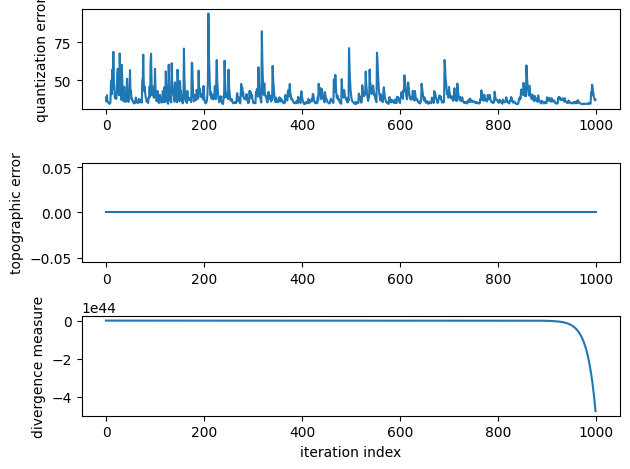

Iteration with minimum quantization error: 973
Quantization Error at optimal iteration: 34.2645
Topographic Error at optimal iteration: 0.0000
Distortion Measure at optimal iteration: -100020670662521714298142538627606442653253632.0000


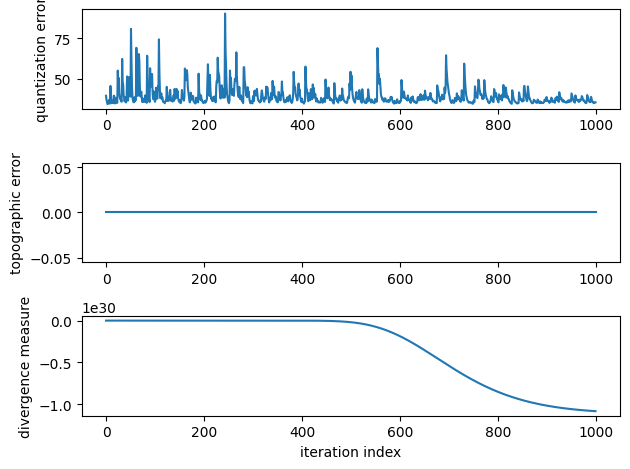

Iteration with minimum quantization error: 3
Quantization Error at optimal iteration: 34.4363
Topographic Error at optimal iteration: 0.0000
Distortion Measure at optimal iteration: 2952.3842


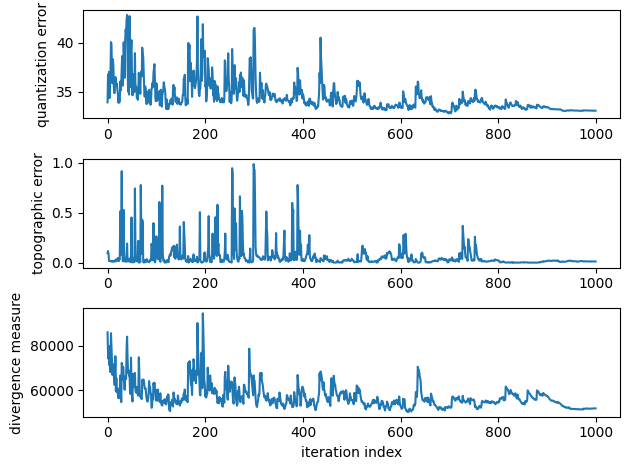

Iteration with minimum quantization error: 698
Quantization Error at optimal iteration: 32.7785
Topographic Error at optimal iteration: 0.0045
Distortion Measure at optimal iteration: 52840.9875


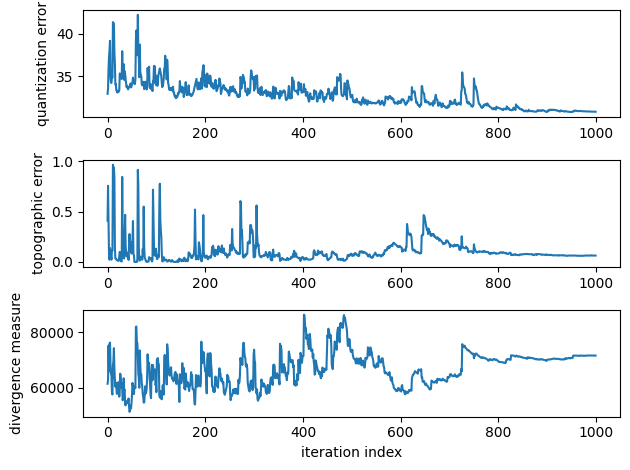

Iteration with minimum quantization error: 950
Quantization Error at optimal iteration: 30.8504
Topographic Error at optimal iteration: 0.0635
Distortion Measure at optimal iteration: 70735.1857


/usr/local/lib/python3.12/dist-packages/minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


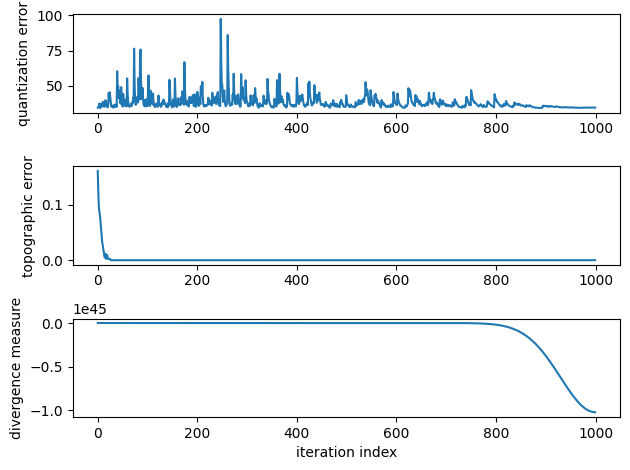

Iteration with minimum quantization error: 5
Quantization Error at optimal iteration: 34.1280
Topographic Error at optimal iteration: 0.0748
Distortion Measure at optimal iteration: -116213.6380


/usr/local/lib/python3.12/dist-packages/minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


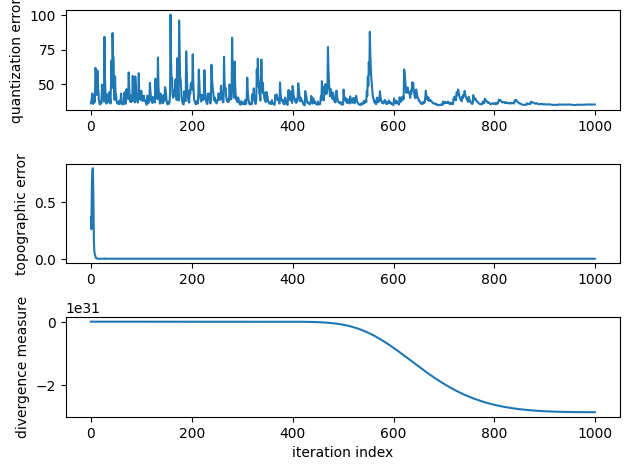

Iteration with minimum quantization error: 689
Quantization Error at optimal iteration: 34.5739
Topographic Error at optimal iteration: 0.0000
Distortion Measure at optimal iteration: -18566789237496055813658074152960.0000


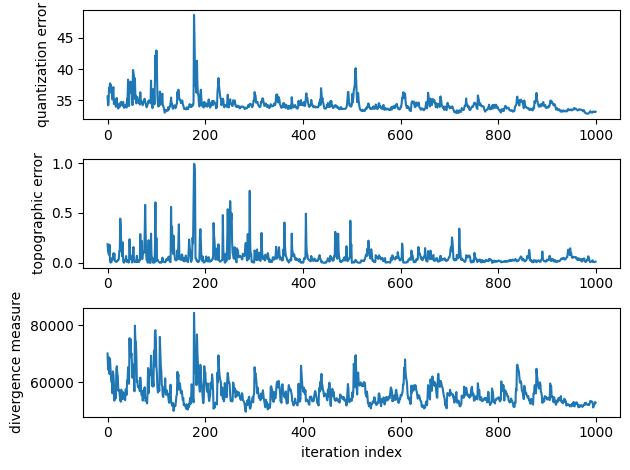

Iteration with minimum quantization error: 983
Quantization Error at optimal iteration: 32.8425
Topographic Error at optimal iteration: 0.0295
Distortion Measure at optimal iteration: 52043.7977


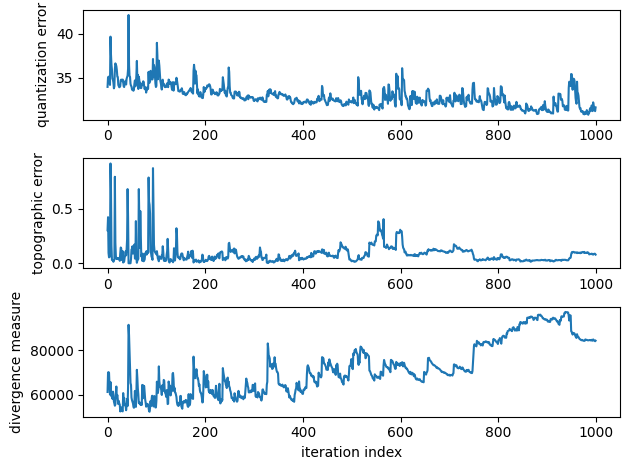

Iteration with minimum quantization error: 984
Quantization Error at optimal iteration: 30.7900
Topographic Error at optimal iteration: 0.0975
Distortion Measure at optimal iteration: 84526.7781


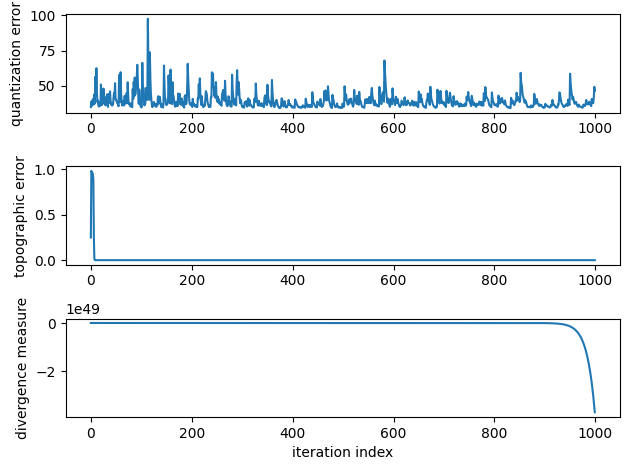

Iteration with minimum quantization error: 832
Quantization Error at optimal iteration: 34.2656
Topographic Error at optimal iteration: 0.0000
Distortion Measure at optimal iteration: -349171527179276184157887403512067972541710336.0000


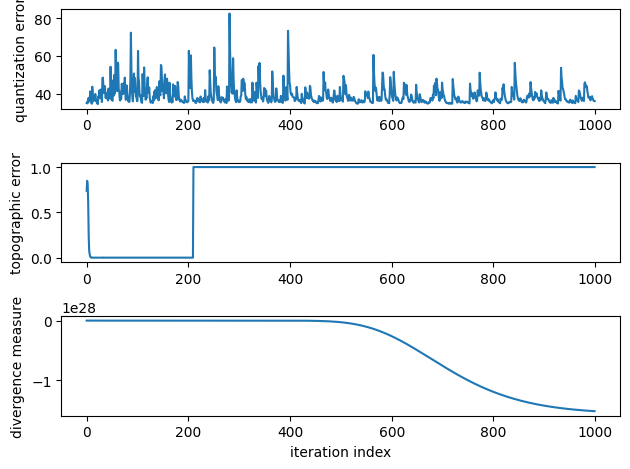

Iteration with minimum quantization error: 22
Quantization Error at optimal iteration: 34.4180
Topographic Error at optimal iteration: 0.0000
Distortion Measure at optimal iteration: -563357.8535


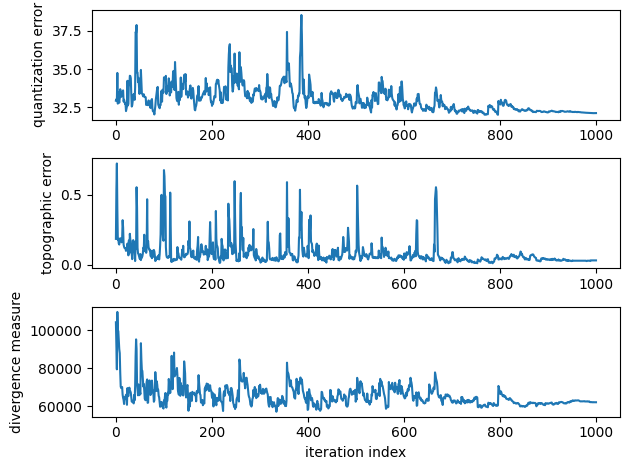

Iteration with minimum quantization error: 795
Quantization Error at optimal iteration: 32.0223
Topographic Error at optimal iteration: 0.0612
Distortion Measure at optimal iteration: 60666.6383


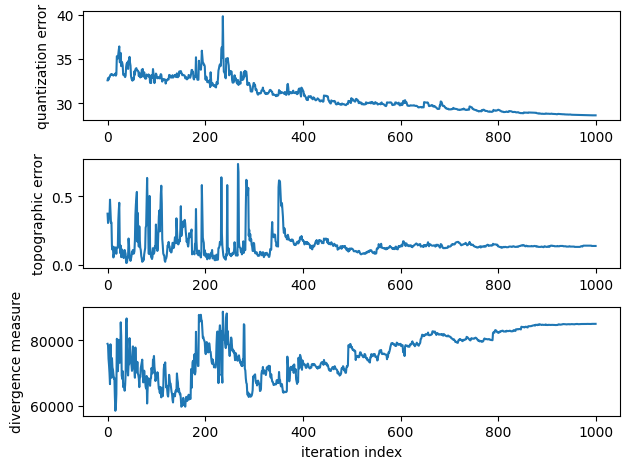

Iteration with minimum quantization error: 999
Quantization Error at optimal iteration: 28.6287
Topographic Error at optimal iteration: 0.1361
Distortion Measure at optimal iteration: 85025.9612


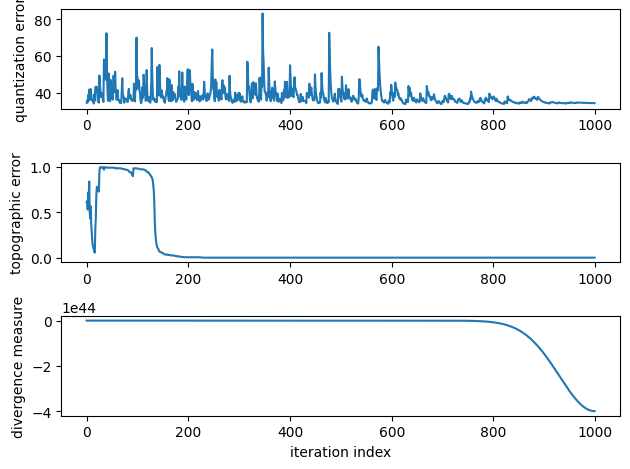

Iteration with minimum quantization error: 627
Quantization Error at optimal iteration: 33.7310
Topographic Error at optimal iteration: 0.0000
Distortion Measure at optimal iteration: -438874626086242817397497521853121429504.0000


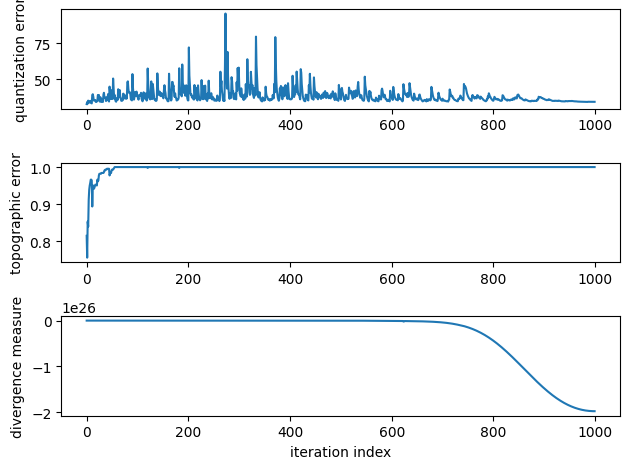

Iteration with minimum quantization error: 0
Quantization Error at optimal iteration: 32.7656
Topographic Error at optimal iteration: 0.8141
Distortion Measure at optimal iteration: -49066.7548


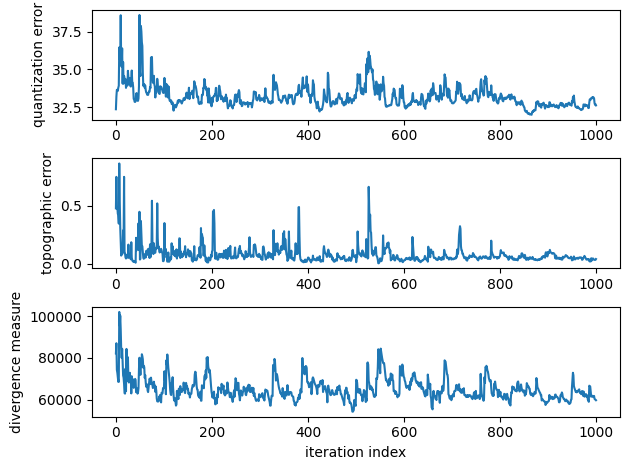

Iteration with minimum quantization error: 865
Quantization Error at optimal iteration: 31.9908
Topographic Error at optimal iteration: 0.0408
Distortion Measure at optimal iteration: 62999.4788


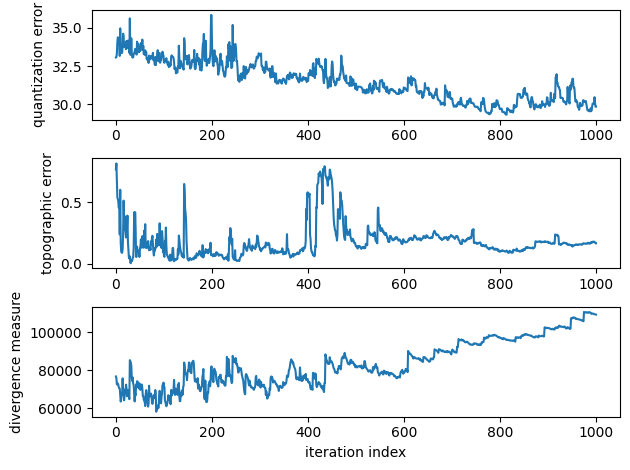

Iteration with minimum quantization error: 812
Quantization Error at optimal iteration: 29.3228
Topographic Error at optimal iteration: 0.1020
Distortion Measure at optimal iteration: 96008.6292


/usr/local/lib/python3.12/dist-packages/minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


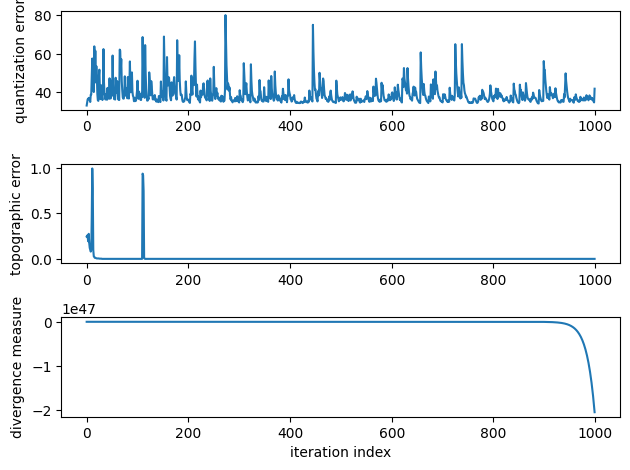

Iteration with minimum quantization error: 0
Quantization Error at optimal iteration: 33.2180
Topographic Error at optimal iteration: 0.2449
Distortion Measure at optimal iteration: -81652.9365


/usr/local/lib/python3.12/dist-packages/minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


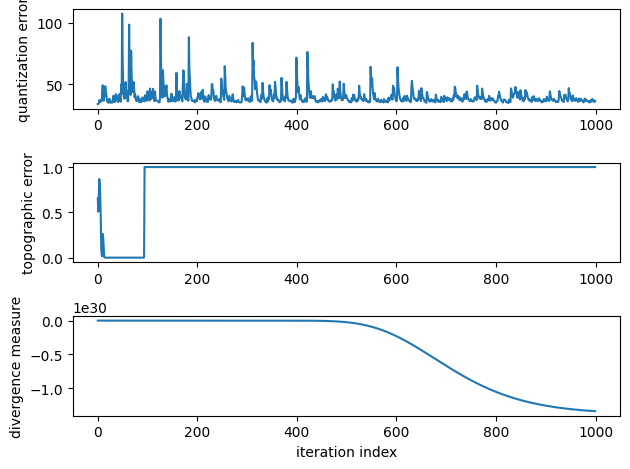

Iteration with minimum quantization error: 0
Quantization Error at optimal iteration: 33.6624
Topographic Error at optimal iteration: 0.6531
Distortion Measure at optimal iteration: -61485.0640


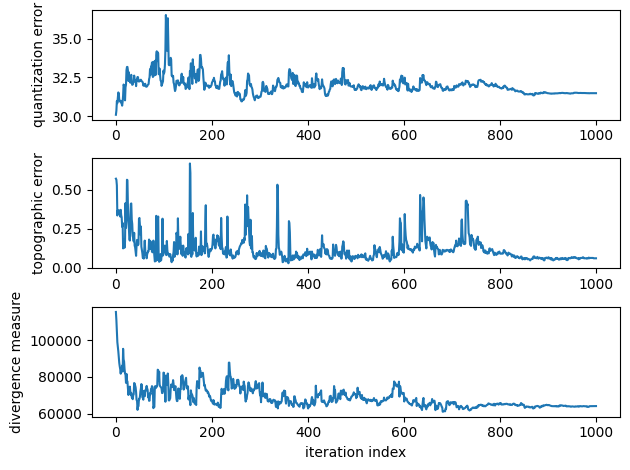

Iteration with minimum quantization error: 0
Quantization Error at optimal iteration: 30.0926
Topographic Error at optimal iteration: 0.5714
Distortion Measure at optimal iteration: 115264.8217


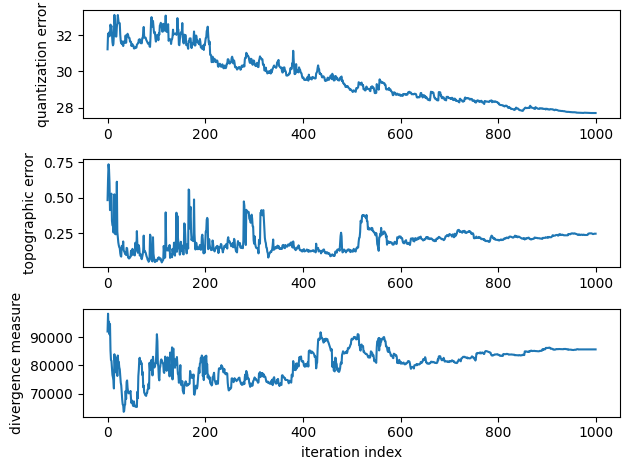

Iteration with minimum quantization error: 999
Quantization Error at optimal iteration: 27.7022
Topographic Error at optimal iteration: 0.2472
Distortion Measure at optimal iteration: 85647.5110


/usr/local/lib/python3.12/dist-packages/minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


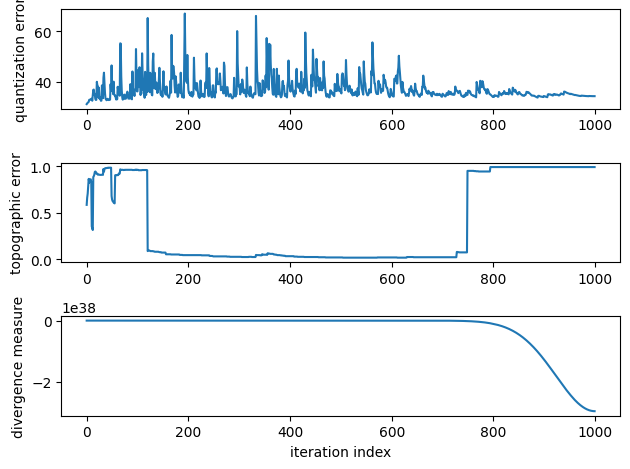

Iteration with minimum quantization error: 0
Quantization Error at optimal iteration: 31.0072
Topographic Error at optimal iteration: 0.5850
Distortion Measure at optimal iteration: -59552.6935


/usr/local/lib/python3.12/dist-packages/minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


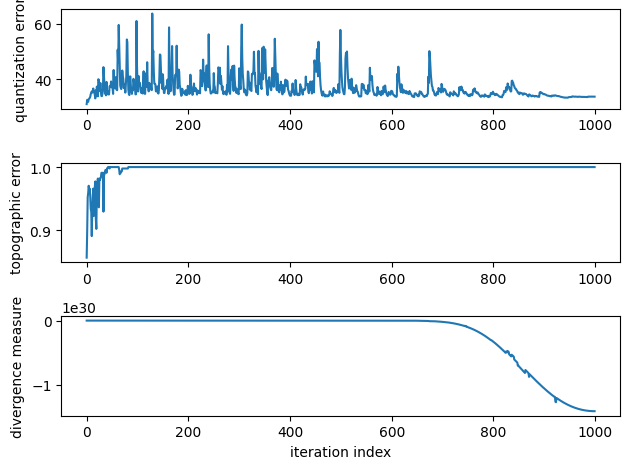

Iteration with minimum quantization error: 0
Quantization Error at optimal iteration: 31.1095
Topographic Error at optimal iteration: 0.8571
Distortion Measure at optimal iteration: -75827.3529


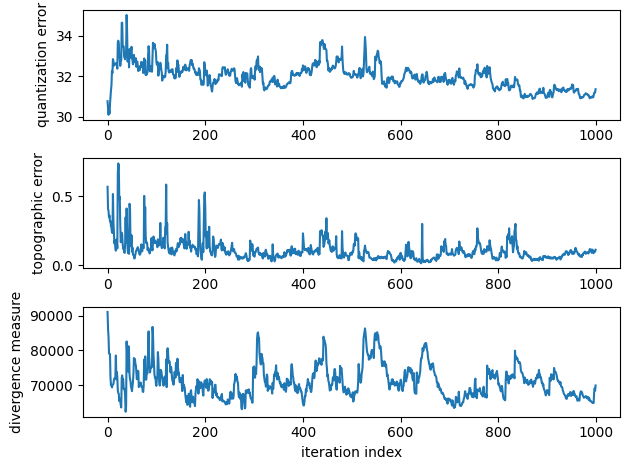

Iteration with minimum quantization error: 2
Quantization Error at optimal iteration: 30.1084
Topographic Error at optimal iteration: 0.3923
Distortion Measure at optimal iteration: 83926.6862


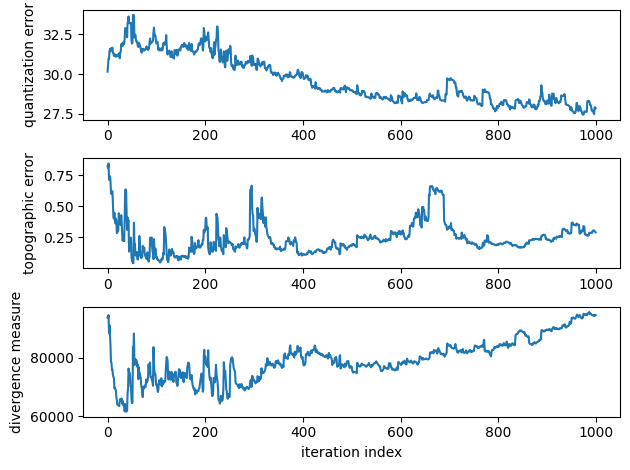

Iteration with minimum quantization error: 973
Quantization Error at optimal iteration: 27.4504
Topographic Error at optimal iteration: 0.3016
Distortion Measure at optimal iteration: 93552.4349


/usr/local/lib/python3.12/dist-packages/minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


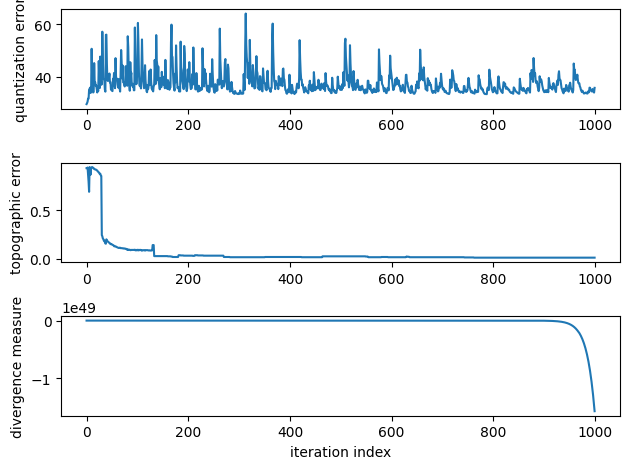

Iteration with minimum quantization error: 0
Quantization Error at optimal iteration: 29.6076
Topographic Error at optimal iteration: 0.9320
Distortion Measure at optimal iteration: -121708.8353


/usr/local/lib/python3.12/dist-packages/minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


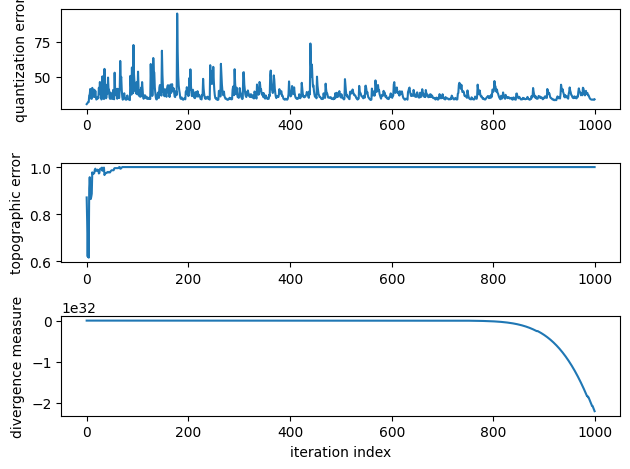

Iteration with minimum quantization error: 0
Quantization Error at optimal iteration: 30.7248
Topographic Error at optimal iteration: 0.8707
Distortion Measure at optimal iteration: -85942.9933


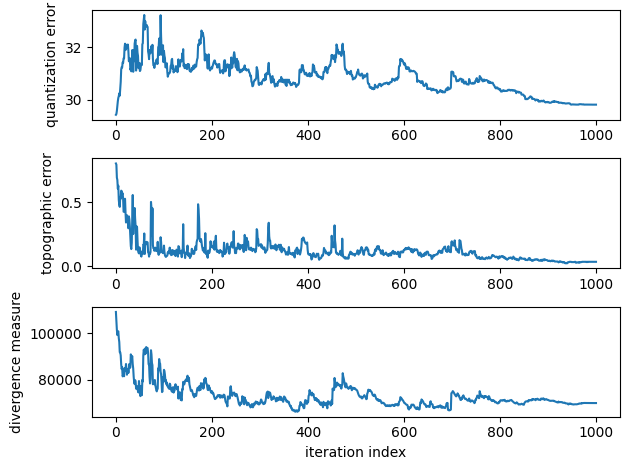

Iteration with minimum quantization error: 0
Quantization Error at optimal iteration: 29.4198
Topographic Error at optimal iteration: 0.8050
Distortion Measure at optimal iteration: 109238.3324


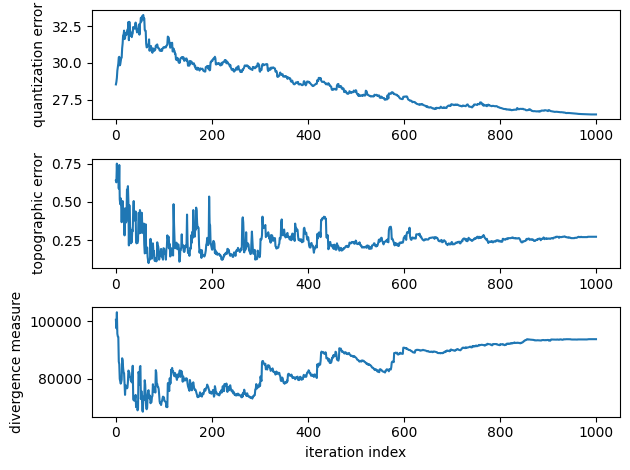

Iteration with minimum quantization error: 984
Quantization Error at optimal iteration: 26.4993
Topographic Error at optimal iteration: 0.2721
Distortion Measure at optimal iteration: 93740.1958


/usr/local/lib/python3.12/dist-packages/minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


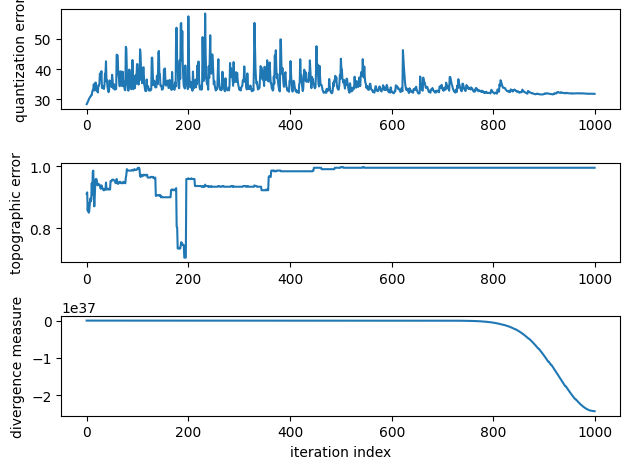

Iteration with minimum quantization error: 0
Quantization Error at optimal iteration: 28.3917
Topographic Error at optimal iteration: 0.9116
Distortion Measure at optimal iteration: -89854.1669


/usr/local/lib/python3.12/dist-packages/minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


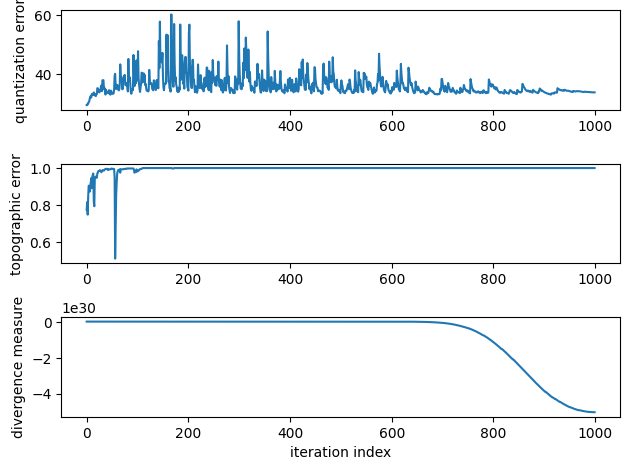

Iteration with minimum quantization error: 0
Quantization Error at optimal iteration: 29.4052
Topographic Error at optimal iteration: 0.7755
Distortion Measure at optimal iteration: -87145.8259


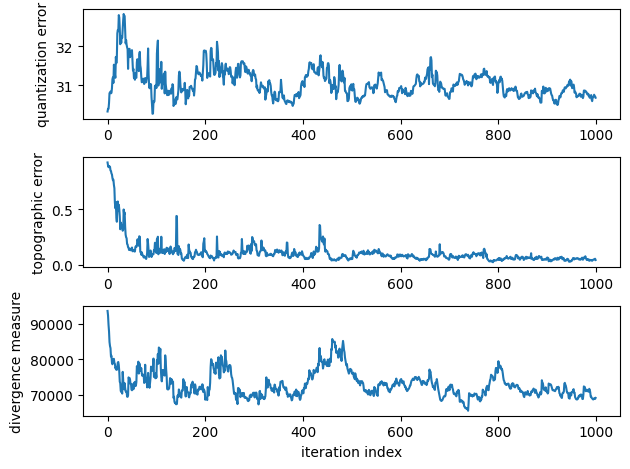

Iteration with minimum quantization error: 92
Quantization Error at optimal iteration: 30.2748
Topographic Error at optimal iteration: 0.0930
Distortion Measure at optimal iteration: 76800.5836


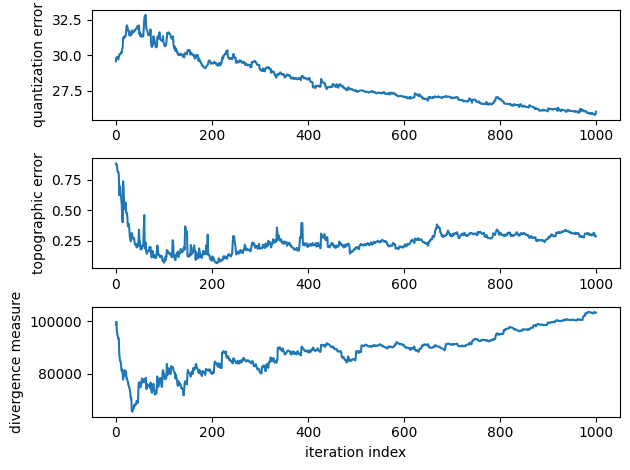

Iteration with minimum quantization error: 997
Quantization Error at optimal iteration: 25.7805
Topographic Error at optimal iteration: 0.2857
Distortion Measure at optimal iteration: 103305.4175


/usr/local/lib/python3.12/dist-packages/minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


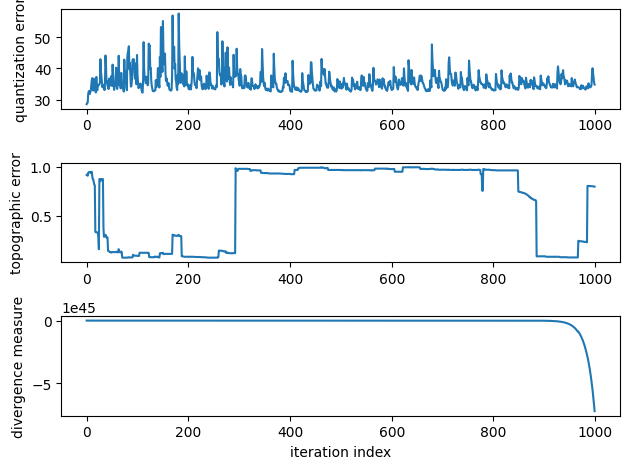

Iteration with minimum quantization error: 0
Quantization Error at optimal iteration: 28.5163
Topographic Error at optimal iteration: 0.9184
Distortion Measure at optimal iteration: -87233.5536


/usr/local/lib/python3.12/dist-packages/minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


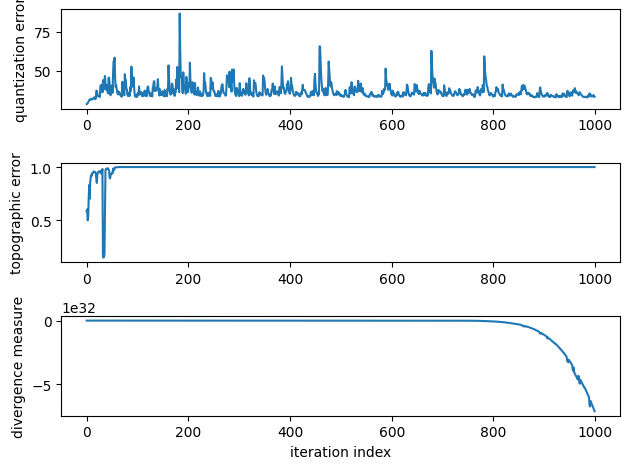

Iteration with minimum quantization error: 0
Quantization Error at optimal iteration: 28.6136
Topographic Error at optimal iteration: 0.5850
Distortion Measure at optimal iteration: -91276.2251


In [ ]:
for axis_size in axis_sizes:
  for decay_function in decay_functions:
    for neighborhood_function in neighborhood_functions:
      for activation_distance in activation_distances:
        for sigma_decay_function in sigma_decay_functions:
          som_trial(axis_size, decay_function, neighborhood_function, activation_distance, sigma_decay_function, random_seed=rs)
          rs += 1

In [ ]:
df_som_trials

,axis_size,decay_function,neighborhood_function,activation_distance,sigma_decay_function,random_seed,optimal_num_of_iteratios,optimal_q_error,optimal_t_error,optimal_d_error
0,2,linear_decay_to_zero,gaussian,cosine,inverse_decay_to_one,149,802,34.060160,0.000000,3.970080e+04
1,2,linear_decay_to_zero,gaussian,cosine,asymptotic_decay,150,465,33.184296,0.000000,4.342939e+04
2,2,linear_decay_to_zero,gaussian,chebyshev,inverse_decay_to_one,151,782,34.237776,0.000000,3.951764e+04
3,2,linear_decay_to_zero,gaussian,chebyshev,asymptotic_decay,152,550,33.410178,0.000000,4.550574e+04
4,2,linear_decay_to_zero,mexican_hat,cosine,inverse_decay_to_one,153,895,34.078590,0.000000,-1.762142e+10
5,2,linear_decay_to_zero,mexican_hat,cosine,asymptotic_decay,154,880,34.613067,0.000000,-2.011250e+29
6,2,linear_decay_to_zero,mexican_hat,chebyshev,inverse_decay_to_one,155,784,34.152840,0.000000,-4.529099e+21
7,2,linear_decay_to_zero,mexican_hat,chebyshev,asymptotic_decay,156,4,34.391004,0.000000,1.114019e+04
8,2,asymptotic_decay,gaussian,cosine,inverse_decay_to_one,157,923,34.130010,0.000000,3.946014e+04
9,2,asymptotic_decay,gaussian,cosine,asymptotic_decay,158,644,33.266686,0.000000,4.437311e+04


In [ ]:
df_som_trials.loc[df_som_trials['optimal_q_error'] == df_som_trials['optimal_q_error'].min()]

,axis_size,decay_function,neighborhood_function,activation_distance,sigma_decay_function,random_seed,optimal_num_of_iteratios,optimal_q_error,optimal_t_error,optimal_d_error
117,6,asymptotic_decay,gaussian,euclidean,asymptotic_decay,266,997,25.780476,0.285714,103305.417474


In [ ]:
df_som_trials.loc[df_som_trials['optimal_t_error'] == df_som_trials['optimal_t_error'].min()]

,axis_size,decay_function,neighborhood_function,activation_distance,sigma_decay_function,random_seed,optimal_num_of_iteratios,optimal_q_error,optimal_t_error,optimal_d_error
0,2,linear_decay_to_zero,gaussian,cosine,inverse_decay_to_one,149,802,34.060160,0.0,3.970080e+04
1,2,linear_decay_to_zero,gaussian,cosine,asymptotic_decay,150,465,33.184296,0.0,4.342939e+04
2,2,linear_decay_to_zero,gaussian,chebyshev,inverse_decay_to_one,151,782,34.237776,0.0,3.951764e+04
3,2,linear_decay_to_zero,gaussian,chebyshev,asymptotic_decay,152,550,33.410178,0.0,4.550574e+04
4,2,linear_decay_to_zero,mexican_hat,cosine,inverse_decay_to_one,153,895,34.078590,0.0,-1.762142e+10
5,2,linear_decay_to_zero,mexican_hat,cosine,asymptotic_decay,154,880,34.613067,0.0,-2.011250e+29
6,2,linear_decay_to_zero,mexican_hat,chebyshev,inverse_decay_to_one,155,784,34.152840,0.0,-4.529099e+21
7,2,linear_decay_to_zero,mexican_hat,chebyshev,asymptotic_decay,156,4,34.391004,0.0,1.114019e+04
8,2,asymptotic_decay,gaussian,cosine,inverse_decay_to_one,157,923,34.130010,0.0,3.946014e+04
9,2,asymptotic_decay,gaussian,cosine,asymptotic_decay,158,644,33.266686,0.0,4.437311e+04


In [ ]:
filtered_df = df_som_trials[df_som_trials['activation_distance'] != 'euclidean']
min_q_error_non_euclidean = filtered_df['optimal_q_error'].min()
filtered_df.loc[filtered_df['optimal_q_error'] == min_q_error_non_euclidean]

,axis_size,decay_function,neighborhood_function,activation_distance,sigma_decay_function,random_seed,optimal_num_of_iteratios,optimal_q_error,optimal_t_error,optimal_d_error
73,6,asymptotic_decay,gaussian,cosine,asymptotic_decay,222,963,26.748241,0.582766,87534.534068


In [ ]:
for axis_size in axis_sizes:
    filtered_df = df_som_trials[(df_som_trials['axis_size'] == axis_size) & (df_som_trials['activation_distance'] != 'euclidean')]
    min_q_error = filtered_df['optimal_q_error'].min()
    filtered_df.loc[filtered_df['optimal_q_error'] == min_q_error]
    print(filtered_df, min_q_error)

    axis_size        decay_function neighborhood_function activation_distance  \
0           2  linear_decay_to_zero              gaussian              cosine   
1           2  linear_decay_to_zero              gaussian              cosine   
2           2  linear_decay_to_zero              gaussian           chebyshev   
3           2  linear_decay_to_zero              gaussian           chebyshev   
4           2  linear_decay_to_zero           mexican_hat              cosine   
5           2  linear_decay_to_zero           mexican_hat              cosine   
6           2  linear_decay_to_zero           mexican_hat           chebyshev   
7           2  linear_decay_to_zero           mexican_hat           chebyshev   
8           2      asymptotic_decay              gaussian              cosine   
9           2      asymptotic_decay              gaussian              cosine   
10          2      asymptotic_decay              gaussian           chebyshev   
11          2      asymptoti

In [ ]:
df_som_trials.loc[[81, 93, 97, 109, 117]] # with euclidian

,axis_size,decay_function,neighborhood_function,activation_distance,sigma_decay_function,random_seed,optimal_num_of_iteratios,optimal_q_error,optimal_t_error,optimal_d_error
81,2,linear_decay_to_zero,gaussian,euclidean,asymptotic_decay,230,998,33.058423,0.000000,49006.537499
93,3,asymptotic_decay,gaussian,euclidean,asymptotic_decay,242,984,30.790048,0.097506,84526.778079
97,4,linear_decay_to_zero,gaussian,euclidean,asymptotic_decay,246,999,28.628750,0.136054,85025.961162
109,5,asymptotic_decay,gaussian,euclidean,asymptotic_decay,258,973,27.450419,0.301587,93552.434889
117,6,asymptotic_decay,gaussian,euclidean,asymptotic_decay,266,997,25.780476,0.285714,103305.417474


In [ ]:
df_som_trials.loc[[11, 25, 41, 57, 73]] # without euclidian

,axis_size,decay_function,neighborhood_function,activation_distance,sigma_decay_function,random_seed,optimal_num_of_iteratios,optimal_q_error,optimal_t_error,optimal_d_error
11,2,asymptotic_decay,gaussian,chebyshev,asymptotic_decay,160,925,33.145589,0.000000,44188.356125
25,3,asymptotic_decay,gaussian,cosine,asymptotic_decay,174,780,31.585425,0.741497,64015.099078
41,4,asymptotic_decay,gaussian,cosine,asymptotic_decay,190,830,30.057645,0.539683,77899.650490
57,5,asymptotic_decay,gaussian,cosine,asymptotic_decay,206,925,28.247138,0.637188,85534.999238
73,6,asymptotic_decay,gaussian,cosine,asymptotic_decay,222,963,26.748241,0.582766,87534.534068


In [ ]:
all_top_q_error_rows = []
for axis_size in df_som_trials['axis_size'].unique():
    print(f"\nTop 5 by Quantization Error for axis_size: {axis_size}\n")
    filtered_df = df_som_trials[(df_som_trials['axis_size'] == axis_size) & (df_som_trials['activation_distance'] != 'euclidean')]
    sorted_df = filtered_df.sort_values(by='optimal_q_error', ascending=True)
    top_5_q_error = sorted_df.head(5)
    print(top_5_q_error)
    all_top_q_error_rows.append(top_5_q_error)

best_q_error_rows_combined = pd.concat(all_top_q_error_rows)
print("\nCombined Top 5 Quantization Error Rows for all Axis Sizes:\n")
best_q_error_rows_combined


Top 5 by Quantization Error for axis_size: 2

    axis_size        decay_function neighborhood_function activation_distance  \
11          2      asymptotic_decay              gaussian           chebyshev   
1           2  linear_decay_to_zero              gaussian              cosine   
9           2      asymptotic_decay              gaussian              cosine   
3           2  linear_decay_to_zero              gaussian           chebyshev   
0           2  linear_decay_to_zero              gaussian              cosine   

    sigma_decay_function  random_seed  optimal_num_of_iteratios  \
11      asymptotic_decay          160                       925   
1       asymptotic_decay          150                       465   
9       asymptotic_decay          158                       644   
3       asymptotic_decay          152                       550   
0   inverse_decay_to_one          149                       802   

    optimal_q_error  optimal_t_error  optimal_d_error  
11     

,axis_size,decay_function,neighborhood_function,activation_distance,sigma_decay_function,random_seed,optimal_num_of_iteratios,optimal_q_error,optimal_t_error,optimal_d_error
11,2,asymptotic_decay,gaussian,chebyshev,asymptotic_decay,160,925,33.145589,0.000000,44188.356125
1,2,linear_decay_to_zero,gaussian,cosine,asymptotic_decay,150,465,33.184296,0.000000,43429.394825
9,2,asymptotic_decay,gaussian,cosine,asymptotic_decay,158,644,33.266686,0.000000,44373.114547
3,2,linear_decay_to_zero,gaussian,chebyshev,asymptotic_decay,152,550,33.410178,0.000000,45505.740011
0,2,linear_decay_to_zero,gaussian,cosine,inverse_decay_to_one,149,802,34.060160,0.000000,39700.795295
25,3,asymptotic_decay,gaussian,cosine,asymptotic_decay,174,780,31.585425,0.741497,64015.099078
27,3,asymptotic_decay,gaussian,chebyshev,asymptotic_decay,176,684,31.855884,0.410431,68085.306597
19,3,linear_decay_to_zero,gaussian,chebyshev,asymptotic_decay,168,988,32.041975,0.263039,57565.975886
17,3,linear_decay_to_zero,gaussian,cosine,asymptotic_decay,166,886,32.084550,0.693878,62208.322355
21,3,linear_decay_to_zero,mexican_hat,cosine,asymptotic_decay,170,0,32.659830,0.190476,-25380.610892


In [ ]:
all_top_t_error_rows = []
for axis_size in df_som_trials['axis_size'].unique():
    print(f"\nTop 5 by Topographic Error for axis_size: {axis_size}\n")
    filtered_df = df_som_trials[(df_som_trials['axis_size'] == axis_size) & (df_som_trials['activation_distance'] != 'euclidean')]
    sorted_df = filtered_df.sort_values(by='optimal_t_error', ascending=True)
    top_5_t_error = sorted_df.head(5)
    print(top_5_t_error)
    all_top_t_error_rows.append(top_5_t_error)

best_t_error_rows_combined = pd.concat(all_top_t_error_rows)
best_t_error_rows_combined


Top 5 by Topographic Error for axis_size: 2

   axis_size        decay_function neighborhood_function activation_distance  \
0          2  linear_decay_to_zero              gaussian              cosine   
1          2  linear_decay_to_zero              gaussian              cosine   
2          2  linear_decay_to_zero              gaussian           chebyshev   
3          2  linear_decay_to_zero              gaussian           chebyshev   
4          2  linear_decay_to_zero           mexican_hat              cosine   

   sigma_decay_function  random_seed  optimal_num_of_iteratios  \
0  inverse_decay_to_one          149                       802   
1      asymptotic_decay          150                       465   
2  inverse_decay_to_one          151                       782   
3      asymptotic_decay          152                       550   
4  inverse_decay_to_one          153                       895   

   optimal_q_error  optimal_t_error  optimal_d_error  
0        34.060160   

,axis_size,decay_function,neighborhood_function,activation_distance,sigma_decay_function,random_seed,optimal_num_of_iteratios,optimal_q_error,optimal_t_error,optimal_d_error
0,2,linear_decay_to_zero,gaussian,cosine,inverse_decay_to_one,149,802,34.060160,0.000000,3.970080e+04
1,2,linear_decay_to_zero,gaussian,cosine,asymptotic_decay,150,465,33.184296,0.000000,4.342939e+04
2,2,linear_decay_to_zero,gaussian,chebyshev,inverse_decay_to_one,151,782,34.237776,0.000000,3.951764e+04
3,2,linear_decay_to_zero,gaussian,chebyshev,asymptotic_decay,152,550,33.410178,0.000000,4.550574e+04
4,2,linear_decay_to_zero,mexican_hat,cosine,inverse_decay_to_one,153,895,34.078590,0.000000,-1.762142e+10
22,3,linear_decay_to_zero,mexican_hat,chebyshev,inverse_decay_to_one,171,263,34.324716,0.000000,-1.544549e+20
20,3,linear_decay_to_zero,mexican_hat,cosine,inverse_decay_to_one,169,477,34.581127,0.000000,-7.619906e+19
28,3,asymptotic_decay,mexican_hat,cosine,inverse_decay_to_one,177,405,35.473105,0.000000,-1.325421e+17
30,3,asymptotic_decay,mexican_hat,chebyshev,inverse_decay_to_one,179,495,34.282227,0.000000,-4.252338e+29
18,3,linear_decay_to_zero,gaussian,chebyshev,inverse_decay_to_one,167,151,33.327378,0.002268,5.201046e+04


In [ ]:
common_cols = ['axis_size', 'decay_function', 'neighborhood_function', 'activation_distance', 'sigma_decay_function', 'random_seed', 'optimal_num_of_iteratios']

best_q_t_error_rows_combined = pd.merge(best_q_error_rows_combined, best_t_error_rows_combined, on=common_cols, how='inner')
best_q_t_error_rows_combined

,axis_size,decay_function,neighborhood_function,activation_distance,sigma_decay_function,random_seed,optimal_num_of_iteratios,optimal_q_error_x,optimal_t_error_x,optimal_d_error_x,optimal_q_error_y,optimal_t_error_y,optimal_d_error_y
0,2,linear_decay_to_zero,gaussian,cosine,asymptotic_decay,150,465,33.184296,0.000000,43429.394825,33.184296,0.000000,43429.394825
1,2,linear_decay_to_zero,gaussian,chebyshev,asymptotic_decay,152,550,33.410178,0.000000,45505.740011,33.410178,0.000000,45505.740011
2,2,linear_decay_to_zero,gaussian,cosine,inverse_decay_to_one,149,802,34.060160,0.000000,39700.795295,34.060160,0.000000,39700.795295
3,4,linear_decay_to_zero,gaussian,chebyshev,asymptotic_decay,184,878,30.668976,0.340136,65395.710846,30.668976,0.340136,65395.710846
4,4,linear_decay_to_zero,gaussian,cosine,inverse_decay_to_one,181,0,31.771551,0.455782,89563.662162,31.771551,0.455782,89563.662162
5,5,asymptotic_decay,gaussian,chebyshev,asymptotic_decay,208,991,28.951540,0.401361,75946.082860,28.951540,0.401361,75946.082860
6,5,linear_decay_to_zero,gaussian,cosine,asymptotic_decay,198,999,29.225896,0.414966,74295.273200,29.225896,0.414966,74295.273200
7,5,linear_decay_to_zero,gaussian,chebyshev,inverse_decay_to_one,199,0,29.745032,0.501134,111451.168837,29.745032,0.501134,111451.168837
8,6,asymptotic_decay,gaussian,cosine,asymptotic_decay,222,963,26.748241,0.582766,87534.534068,26.748241,0.582766,87534.534068
9,6,linear_decay_to_zero,gaussian,cosine,asymptotic_decay,214,999,27.511673,0.591837,83605.644110,27.511673,0.591837,83605.644110


In [ ]:
df_som_trials.loc[[11, 56]]

,axis_size,decay_function,neighborhood_function,activation_distance,sigma_decay_function,random_seed,optimal_num_of_iteratios,optimal_q_error,optimal_t_error,optimal_d_error
11,2,asymptotic_decay,gaussian,chebyshev,asymptotic_decay,160,925,33.145589,0.000000,44188.356125
56,5,asymptotic_decay,gaussian,cosine,inverse_decay_to_one,205,283,31.295166,0.061224,70734.769087


In [ ]:
df_som_trials = pd.read_csv("df_som_trials (1).csv", decimal=',', index_col=0)
df_som_trials

,axis_size,decay_function,neighborhood_function,activation_distance,sigma_decay_function,random_seed,optimal_num_of_iteratios,optimal_q_error,optimal_t_error,optimal_d_error
0,2,linear_decay_to_zero,gaussian,cosine,inverse_decay_to_one,149,802,34.06015985656142,0.0,39700.79529525355
1,2,linear_decay_to_zero,gaussian,cosine,asymptotic_decay,150,465,33.18429558273549,0.0,43429.3948249132
2,2,linear_decay_to_zero,gaussian,chebyshev,inverse_decay_to_one,151,782,34.237775770797676,0.0,39517.64174995046
3,2,linear_decay_to_zero,gaussian,chebyshev,asymptotic_decay,152,550,33.41017821127275,0.0,45505.74001051272
4,2,linear_decay_to_zero,mexican_hat,cosine,inverse_decay_to_one,153,895,34.078590086988115,0.0,-17621420104.53311
...,...,...,...,...,...,...,...,...,...,...
115,6,linear_decay_to_zero,mexican_hat,euclidean,asymptotic_decay,264,0,29.40516814405496,0.7755102040816326,-87145.82586671191
116,6,asymptotic_decay,gaussian,euclidean,inverse_decay_to_one,265,92,30.274849296299884,0.09297052154195011,76800.58357832483
117,6,asymptotic_decay,gaussian,euclidean,asymptotic_decay,266,997,25.780475539587854,0.2857142857142857,103305.41747423881
118,6,asymptotic_decay,mexican_hat,euclidean,inverse_decay_to_one,267,0,28.516330820869896,0.9183673469387755,-87233.55355823276


In [ ]:
df_som_trials.dtypes

,0
axis_size,float64
decay_function,object
neighborhood_function,object
activation_distance,object
sigma_decay_function,object
random_seed,int64
optimal_num_of_iteratios,int64
optimal_q_error,float64
optimal_t_error,float64
optimal_d_error,float64


In [ ]:
for column in df_som_trials.columns:
  if column in ["optimal_q_error", "optimal_t_error", "optimal_d_error"]:
    df_som_trials[column] = df_som_trials[column].astype(float)

In [ ]:
all_top_q_error_rows = []
for axis_size in df_som_trials['axis_size'].unique():
    print(f"\nTop 5 by Quantization Error for axis_size: {axis_size}\n")
    filtered_df = df_som_trials[(df_som_trials['axis_size'] == axis_size)]
    sorted_df = filtered_df.sort_values(by='optimal_q_error', ascending=True)
    top_5_q_error = sorted_df.head(5)
    print(top_5_q_error)
    all_top_q_error_rows.append(top_5_q_error)

best_q_error_rows_combined = pd.concat(all_top_q_error_rows)
print("\nCombined Top 5 Quantization Error Rows for all Axis Sizes:\n")
best_q_error_rows_combined


Top 5 by Quantization Error for axis_size: 2.0

    axis_size        decay_function neighborhood_function activation_distance  \
81        2.0  linear_decay_to_zero              gaussian           euclidean   
11        2.0      asymptotic_decay              gaussian           chebyshev   
85        2.0      asymptotic_decay              gaussian           euclidean   
1         2.0  linear_decay_to_zero              gaussian              cosine   
9         2.0      asymptotic_decay              gaussian              cosine   

   sigma_decay_function  random_seed  optimal_num_of_iteratios  \
81     asymptotic_decay          230                       998   
11     asymptotic_decay          160                       925   
85     asymptotic_decay          234                       830   
1      asymptotic_decay          150                       465   
9      asymptotic_decay          158                       644   

    optimal_q_error  optimal_t_error  optimal_d_error  
81        3

,axis_size,decay_function,neighborhood_function,activation_distance,sigma_decay_function,random_seed,optimal_num_of_iteratios,optimal_q_error,optimal_t_error,optimal_d_error
81,2.0,linear_decay_to_zero,gaussian,euclidean,asymptotic_decay,230,998,33.058423,0.000000,49006.537499
11,2.0,asymptotic_decay,gaussian,chebyshev,asymptotic_decay,160,925,33.145589,0.000000,44188.356125
85,2.0,asymptotic_decay,gaussian,euclidean,asymptotic_decay,234,830,33.182189,0.000000,46532.808007
1,2.0,linear_decay_to_zero,gaussian,cosine,asymptotic_decay,150,465,33.184296,0.000000,43429.394825
9,2.0,asymptotic_decay,gaussian,cosine,asymptotic_decay,158,644,33.266686,0.000000,44373.114547
93,3.0,asymptotic_decay,gaussian,euclidean,asymptotic_decay,242,984,30.790048,0.097506,84526.778079
89,3.0,linear_decay_to_zero,gaussian,euclidean,asymptotic_decay,238,950,30.850435,0.063492,70735.185665
25,3.0,asymptotic_decay,gaussian,cosine,asymptotic_decay,174,780,31.585425,0.741497,64015.099078
27,3.0,asymptotic_decay,gaussian,chebyshev,asymptotic_decay,176,684,31.855884,0.410431,68085.306597
19,3.0,linear_decay_to_zero,gaussian,chebyshev,asymptotic_decay,168,988,32.041975,0.263039,57565.975886


In [ ]:
all_top_t_error_rows = []
for axis_size in df_som_trials['axis_size'].unique():
    print(f"\nTop 5 by Topographic Error for axis_size: {axis_size}\n")
    filtered_df = df_som_trials[(df_som_trials['axis_size'] == axis_size)]
    sorted_df = filtered_df.sort_values(by='optimal_t_error', ascending=True)
    top_5_t_error = sorted_df.head(5)
    print(top_5_t_error)
    all_top_t_error_rows.append(top_5_t_error)

best_t_error_rows_combined = pd.concat(all_top_t_error_rows)
best_t_error_rows_combined


Top 5 by Topographic Error for axis_size: 2.0

   axis_size        decay_function neighborhood_function activation_distance  \
0        2.0  linear_decay_to_zero              gaussian              cosine   
1        2.0  linear_decay_to_zero              gaussian              cosine   
2        2.0  linear_decay_to_zero              gaussian           chebyshev   
3        2.0  linear_decay_to_zero              gaussian           chebyshev   
4        2.0  linear_decay_to_zero           mexican_hat              cosine   

   sigma_decay_function  random_seed  optimal_num_of_iteratios  \
0  inverse_decay_to_one          149                       802   
1      asymptotic_decay          150                       465   
2  inverse_decay_to_one          151                       782   
3      asymptotic_decay          152                       550   
4  inverse_decay_to_one          153                       895   

   optimal_q_error  optimal_t_error  optimal_d_error  
0        34.060160 

,axis_size,decay_function,neighborhood_function,activation_distance,sigma_decay_function,random_seed,optimal_num_of_iteratios,optimal_q_error,optimal_t_error,optimal_d_error
0,2.0,linear_decay_to_zero,gaussian,cosine,inverse_decay_to_one,149,802,34.060160,0.000000,3.970080e+04
1,2.0,linear_decay_to_zero,gaussian,cosine,asymptotic_decay,150,465,33.184296,0.000000,4.342939e+04
2,2.0,linear_decay_to_zero,gaussian,chebyshev,inverse_decay_to_one,151,782,34.237776,0.000000,3.951764e+04
3,2.0,linear_decay_to_zero,gaussian,chebyshev,asymptotic_decay,152,550,33.410178,0.000000,4.550574e+04
4,2.0,linear_decay_to_zero,mexican_hat,cosine,inverse_decay_to_one,153,895,34.078590,0.000000,-1.762142e+10
22,3.0,linear_decay_to_zero,mexican_hat,chebyshev,inverse_decay_to_one,171,263,34.324716,0.000000,-1.544549e+20
20,3.0,linear_decay_to_zero,mexican_hat,cosine,inverse_decay_to_one,169,477,34.581127,0.000000,-7.619906e+19
28,3.0,asymptotic_decay,mexican_hat,cosine,inverse_decay_to_one,177,405,35.473105,0.000000,-1.325421e+17
30,3.0,asymptotic_decay,mexican_hat,chebyshev,inverse_decay_to_one,179,495,34.282227,0.000000,-4.252338e+29
95,3.0,asymptotic_decay,mexican_hat,euclidean,asymptotic_decay,244,22,34.418031,0.000000,-5.633579e+05


In [ ]:
common_cols = ['axis_size', 'decay_function', 'neighborhood_function', 'activation_distance', 'sigma_decay_function', 'random_seed', 'optimal_num_of_iteratios']

best_q_t_error_rows_combined = pd.merge(best_q_error_rows_combined, best_t_error_rows_combined, on=common_cols, how='inner')
best_q_t_error_rows_combined

,axis_size,decay_function,neighborhood_function,activation_distance,sigma_decay_function,random_seed,optimal_num_of_iteratios,optimal_q_error_x,optimal_t_error_x,optimal_d_error_x,optimal_q_error_y,optimal_t_error_y,optimal_d_error_y
0,2.0,linear_decay_to_zero,gaussian,cosine,asymptotic_decay,150,465,33.184296,0.000000,43429.394825,33.184296,0.000000,43429.394825
1,4.0,linear_decay_to_zero,gaussian,euclidean,asymptotic_decay,246,999,28.628750,0.136054,85025.961162,28.628750,0.136054,85025.961162
2,4.0,asymptotic_decay,gaussian,euclidean,asymptotic_decay,250,812,29.322814,0.102041,96008.629151,29.322814,0.102041,96008.629151
3,5.0,asymptotic_decay,gaussian,euclidean,asymptotic_decay,258,973,27.450419,0.301587,93552.434889,27.450419,0.301587,93552.434889
4,5.0,linear_decay_to_zero,gaussian,euclidean,asymptotic_decay,254,999,27.702225,0.247166,85647.511028,27.702225,0.247166,85647.511028
5,6.0,asymptotic_decay,gaussian,euclidean,asymptotic_decay,266,997,25.780476,0.285714,103305.417474,25.780476,0.285714,103305.417474
6,6.0,linear_decay_to_zero,gaussian,euclidean,asymptotic_decay,262,984,26.499259,0.272109,93740.195842,26.499259,0.272109,93740.195842
7,6.0,asymptotic_decay,gaussian,cosine,asymptotic_decay,222,963,26.748241,0.582766,87534.534068,26.748241,0.582766,87534.534068
